In [0]:
import time
import numpy as np
from scipy.linalg import inv, sqrtm, eig
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans

In [0]:
import numpy as np
from scipy.linalg import inv, sqrtm, eig
import matplotlib.pyplot as pyplot

In [0]:
 from numpy import matlib as mb

In [0]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import  KMeans
import cv2
import scipy.misc
import matplotlib.pyplot as pyplot


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,filters,feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
% matplotlib inline

In [0]:
import scipy.io

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
class IRMAD:
    def __init__(self,after,before):
        self.after = after
        self.before = before
    def process(self):
        after = self.after
        before = self.before
        (rows, cols, bands) = after.shape



        after = np.transpose(np.reshape(after, (rows * cols, bands)), (1, 0))
        before = np.transpose(np.reshape(before, (rows * cols, bands)), (1, 0))

        after_mean = np.mean(after, axis=1)
        after_var = np.std(after, axis=1)
        before_mean = np.mean(before, axis=1)
        before_var = np.std(before, axis=1)

        # for i in range(bands):
        #     #test = after[:, i] - after_mean[i]
        #     after[i,:] = (after[i,:]-after_mean[i])/after_var[i]
        #     before[i,:] = (before[i,:]-before_mean[i])/before_var[i]

        cov_aa_mari = np.cov(after)
        cov_aa_mat_i = np.linalg.inv(cov_aa_mari)
        con_cov = np.cov(after, before)
        cov_xx = con_cov[0:bands, 0:bands]
        cov_xy = con_cov[0:bands, bands:]
        cov_yx = con_cov[bands:, 0:bands]
        cov_yy = con_cov[bands:, bands:]
        # yy_cov = np.cov(before)
        A = inv(cov_xx) @ cov_xy @ inv(cov_yy) @ cov_yx
        B = inv(cov_yy) @ cov_yx @ inv(cov_xx) @ cov_xy  # 与A特征值相同，但特征向量不同

        # A的特征值与特征向量 av 特征值， ad 特征向量
        [av, ad] = eig(A)

        # 对特征值从小到大排列 与 CCA相反
        swap_av_index = np.argsort(av)
        swap_av = av[swap_av_index[:av.size:1]]
        swap_ad = ad[swap_av_index[:av.size:1], :]

        # 满足st 条件
        ma = inv(sqrtm(swap_ad.T @ cov_xx @ swap_ad))  # 条件一

        swap_ad = swap_ad @ ma

        # 对应b的值
        [bv, bd] = eig(B)
        swap_bv = bv[swap_av_index[:bv.size:1]]
        swap_bd = bd[swap_av_index[:bd.size:1]]
        mb = inv(sqrtm(swap_bd.T @ cov_yy @ swap_bd))  # 条件二

        swap_bd = swap_bd @ mb
        # ab = np.linalg.inv(cov_yy) @ cov_yx @ swap_ad
        # bb = np.linalg.inv()

        MAD = swap_ad.T @ after - (swap_bd.T @ before)
        [i, j] = MAD.shape
        var_mad = np.zeros(i)
        for k in range(i):
            var_mad[k] = np.var(MAD[k])
        var_mad = np.transpose(np.matlib.repmat(var_mad, j, 1), (1, 0))
        res = MAD * MAD / var_mad
        T = res.sum(axis=0)
        # T = np.zeros(j)
        # #for row in range(j):
        # sum = 0.
        # for col in range(i):
        #     sum = np.sum(np.square(MAD[col,:] / np.var(MAD[col])))
        #     T[i] = sum
        # Kmeans 聚类


        re = np.reshape(T, (j, 1))
        kmeans = KMeans(n_clusters=2, random_state=0).fit(re)
        img = np.reshape(kmeans.labels_, (rows, cols,))
        center = kmeans.cluster_centers_
        pyplot.imshow(np.uint8(img))
        pyplot.show()
        # scipy.misc.imsave('c.jpg', img)
        print(center)

In [0]:
import cv2

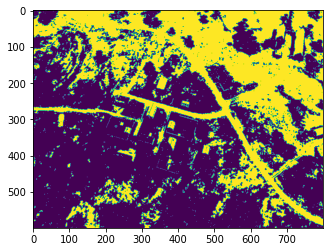

[[10.25207218]
 [22.92581761]]
Time = 0.0001340000000000785 seconds


In [0]:
if __name__ == "__main__":

    after = cv2.imread("/content/drive/My Drive/SampleTestImage.png")
    before = cv2.imread("/content/drive/My Drive/SampleReferenceImage.png")
    irmad = IRMAD(after,before)
    irmad.process()
    start_time = time.clock()
print("Time =", time.clock() - start_time, "seconds")  